<h1>허프 변환을 활용한 직선 검출<h1>

<h2>허프 변환 이란?</h2>

    2차원 x,y 좌표상에서 직선의 방정식을 파라미터 공간으로 변환하여 직선을 찾는 알고리즘.
    일반적인 2차원 평면에서는 다음과 같은 식을 가짐
    
                                        y = ax + b
                                        
    위 식을 삼각 함수를 통해 변형하면 아래와 같은 수식을 얻을 수 있음
                                    r = 𝑥 cos 𝜃 + 𝑦 sin 𝜃 

    
![img](./img/hough_line/hough.png)

    출처 : 위키피디아
    
    각 점 x,y에 대해서  𝜃 값을 1 ~ 180까지 값을 변화시키며 원점에서 x,y 까지의 거리 r 을 구한다. 그러면 (𝜃, r)로 
    이루어진 2차원 배열을 얻을 수 있음
    
![img](./img/hough_line/hough2.png)

    그 이후 이 2차원 배열을 다시 그래프로 나타내면 사인파 그래프가 되며, 
    3개의 선이 만나는 지점이 직선일 확률이 높다.
    
    
<h2>OpenCV에서의 허프 변환을 이용한 직선 검출</h2>

    opencv에서는 cv2.HoughLines()를 이용해 허프변환을 사용하여 직선을 검출할 수 있다.
    
    공식 문서에 따르면 조정할 수 있는 인자들은 다음과 같다.
    
![img](./img/hough_line/hough3.png)
    
    먼저 입력받는 이미지는 보통 Canny 등을 통해 에지 검출을 한 이미지를 사용한다.
    
    rho는 ρ 값의 해상도(픽셀 단위),theta는 Θ 값의 해상도(라디안 단위)를 나타내는데, 즉 축척 배열의 크기를 결정하는 역할을 한다.
    
    threshold 인자에서는 축적 배열에서 직선으로 판단할 임계값을 나타내는데, 이 값이 높을 수록 많은 직선을 검출한다.

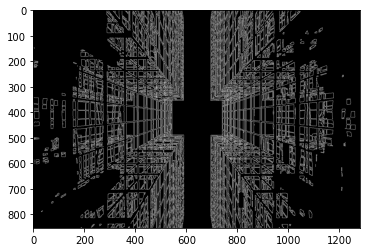

In [3]:
def two_img_show(fir_img,fir_name,sec_img,sec_name):
    fig = plt.figure()
    fig.set_size_inches(20, 20)
    rows = 1
    cols = 2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(cv2.cvtColor(fir_img, cv2.COLOR_BGR2RGB))
    ax1.set_title(fir_name)
    ax1.axis("off")

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(cv2.cvtColor(sec_img, cv2.COLOR_BGR2RGB))
    ax2.set_title(sec_name)
    ax2.axis("off")

    plt.show()
    
# 이미지를 캐니 검출로 에지를 검출한다.
import cv2
import matplotlib.pyplot as plt
origin_img = cv2.imread('./img/hough_line/line.jpg')
img_gray = cv2.imread('./img/hough_line/line.jpg',cv2.IMREAD_GRAYSCALE)
canny_img = cv2.Canny(img_gray,500,150)
plt.imshow(canny_img,cmap='gray')

In [4]:

#opencv의 houghLines로 선을 검출
import numpy as np

lines = cv2.HoughLines(canny_img,1,np.pi/180,300)


#검출된 선들
lines
#(거리 r,각도 𝜃 )

array([[[ 7.5800000e+02,  0.0000000e+00]],

       [[ 7.4200000e+02,  0.0000000e+00]],

       [[ 6.9500000e+02,  0.0000000e+00]],

       [[ 7.1200000e+02,  0.0000000e+00]],

       [[ 7.6200000e+02,  0.0000000e+00]],

       [[ 7.0000000e+02,  0.0000000e+00]],

       [[ 7.2000000e+02,  0.0000000e+00]],

       [[ 7.2200000e+02,  0.0000000e+00]],

       [[ 7.0500000e+02,  0.0000000e+00]],

       [[ 7.3200000e+02,  0.0000000e+00]],

       [[ 7.9100000e+02,  0.0000000e+00]],

       [[ 7.3000000e+02,  0.0000000e+00]],

       [[ 7.3400000e+02,  0.0000000e+00]],

       [[ 5.1200000e+02,  0.0000000e+00]],

       [[ 7.6600000e+02,  0.0000000e+00]],

       [[ 5.3700000e+02,  0.0000000e+00]],

       [[ 7.5000000e+02,  0.0000000e+00]],

       [[ 7.1400000e+02,  0.0000000e+00]],

       [[ 7.4800000e+02,  0.0000000e+00]],

       [[ 8.8800000e+02,  0.0000000e+00]],

       [[ 7.2500000e+02,  0.0000000e+00]],

       [[ 5.3200000e+02,  0.0000000e+00]],

       [[ 8.3400000e+02,  0.0000

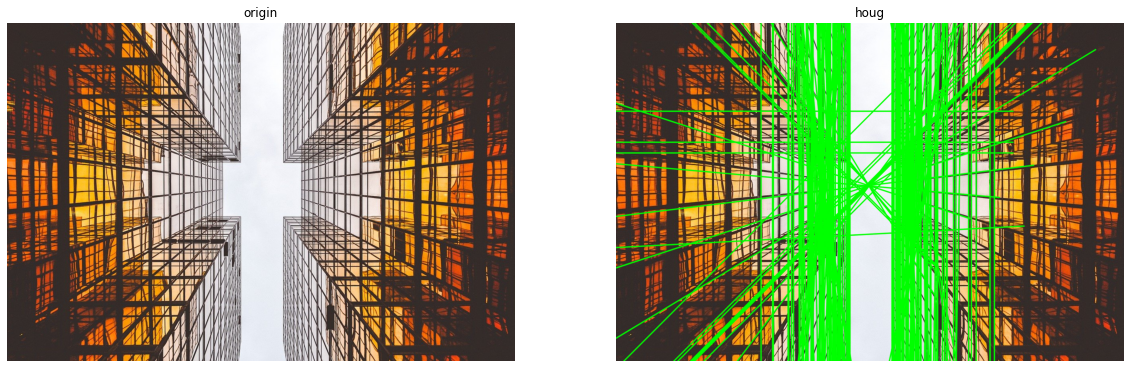

In [5]:
#얻은 r과 𝜃 변환하여 직선으로 그림
ALPHA = 1000
houghline_img = origin_img.copy()

for line in lines: 
    rho,theta = line[0] 
    cos_t = np.cos(theta)
    sin_t= np.sin(theta) 
    x0 = cos_t*rho 
    y0 = sin_t*rho 
    pt1 = (round(x0+ALPHA*(-sin_t)),round(y0+ALPHA*(cos_t)) )
    pt2 = (round(x0-ALPHA*(-sin_t)),round(y0-ALPHA*(cos_t)) )
    
    cv2.line(houghline_img,pt1,pt2,(0,255,0),2,cv2.LINE_AA )


two_img_show(origin_img,'origin',houghline_img,'houg')
#최종 결과물

# 허프변환 두번째, 확률적 허프 변환

    기존 허프 변환을 최적화한 버전,
    선분을 찾는 것이기 때문에, 직선의 시작점과 끝점 좌표를 반환
    
    기존 허프 변환처럼 캐니를 사용해 에지를 검출한 이미지를 사용함
    
    HoughLinesP()로 사용가능하며 다음과 같은 인자들을 조절할 수 있음
    
![img](./img/hough_line/phough.png)

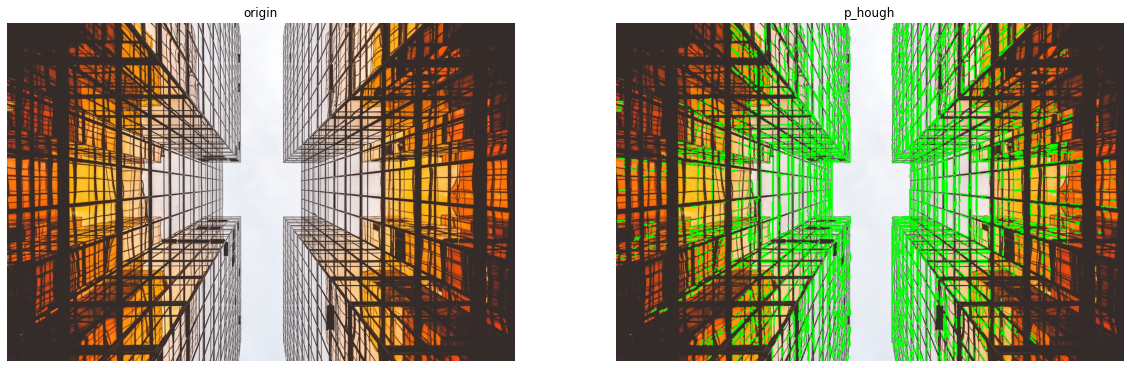

In [6]:
#확률적 허프 변환
p_houghline_img = origin_img.copy()

lines = cv2.HoughLinesP(canny_img,1,np.pi/180,150)


for line in lines: 
    l = line[0]
    cv2.line(p_houghline_img,(l[0],l[1]),(l[2],l[3]),(0,255,0),2,cv2.LINE_AA )
    
two_img_show(origin_img,'origin',p_houghline_img,'p_hough')

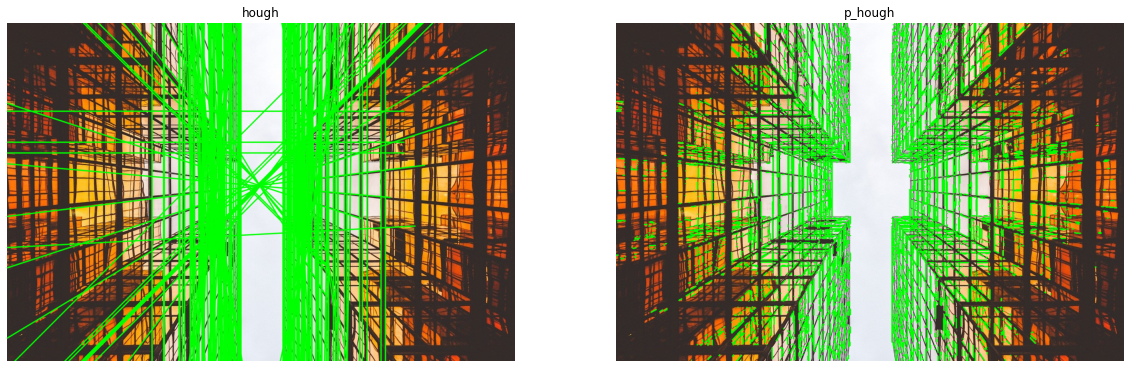

In [7]:
#일반 허프 변환과 확률적 허프 변환 결과 비교
two_img_show(houghline_img,'hough',p_houghline_img,'p_hough')